1. Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


2. Load Data

In [2]:
sales_df = pd.read_csv('../Data/Sales.csv')
items_df = pd.read_csv('../Data/item.csv')
promotion_df = pd.read_csv('../Data/Promotion.csv')
supermarkets_df = pd.read_csv('../Data/Supermarkets.csv')

In [3]:
sales_df.head()

,code,amount,units,time,province,week,customerId,supermarket,basket,day,voucher
0,7680850106,0.80,1,1100,2,1,125434,244,1,1,0
1,3620000470,3.59,1,1100,2,1,125434,244,1,1,0
2,1800028064,2.25,1,1137,2,1,108320,244,2,1,0
3,9999985067,0.85,1,1148,2,1,162016,244,3,1,0
4,9999985131,2.19,1,1323,2,1,89437,244,4,1,0


In [4]:
items_df.head()

,code,descrption,type,brand,size
0,3000005040,AUNT JEM ORIGINAL PANCAKE MIX,Type 1,Aunt Jemima,2 LB
1,3000005070,A/JEM COMPLETE PANCAKE MI,Type 1,Aunt Jemima,32 OZ
2,3000005300,AJ BUTTERMILK PANCAKE MIX,Type 1,Aunt Jemima,32 OZ
3,3000005350,A J BTRMLK COMP PNCK MIX,Type 1,Aunt Jemima,1 LB
4,1600015760,BC PANCAKE MIX BUTTERMILK,Type 1,Bisquick,6.75 OZ


In [5]:
promotion_df.head()

,code,supermarkets,week,feature,display,province
0,2700042240,285,91,Not on Feature,Mid-Aisle End Cap,2
1,2700042292,285,92,Interior Page Feature,Not on Display,2
2,2700042274,285,92,Interior Page Feature,Not on Display,2
3,2700042273,285,92,Interior Page Feature,Not on Display,2
4,2700042254,285,92,Interior Page Feature,Not on Display,2


In [6]:
supermarkets_df.head()

,supermarket_No,postal-code
0,199,30319
1,200,30134
2,201,30066
3,202,31093
4,203,30542


3. Data Exploration

In [7]:
#Inspect the data structure
for df_name, df in zip(['Sales', 'Items', 'Promotion', 'Supermarkets'], 
                       [sales_df, items_df, promotion_df, supermarkets_df]):
    print(f"\n{df_name} DataFrame:")
    print(df.info())
    print("\nFirst few rows:")
    print(df.head())


Sales DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   code         1048575 non-null  int64  
 1   amount       1048575 non-null  float64
 2   units        1048575 non-null  int64  
 3   time         1048575 non-null  int64  
 4   province     1048575 non-null  int64  
 5   week         1048575 non-null  int64  
 6   customerId   1048575 non-null  int64  
 7   supermarket  1048575 non-null  int64  
 8   basket       1048575 non-null  int64  
 9   day          1048575 non-null  int64  
 10  voucher      1048575 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 88.0 MB
None

First few rows:
         code  amount  units  time  province  week  customerId  supermarket  \
0  7680850106    0.80      1  1100         2     1      125434          244   
1  3620000470    3.59      1  1100         2     1      125434   

In [8]:
# Check for missing values
for df_name, df in zip(['Sales', 'Items', 'Promotion', 'Supermarkets'], 
                       [sales_df, items_df, promotion_df, supermarkets_df]):
    print(f"\nMissing values in {df_name} DataFrame:")
    print(df.isnull().sum())


Missing values in Sales DataFrame:
code           0
amount         0
units          0
time           0
province       0
week           0
customerId     0
supermarket    0
basket         0
day            0
voucher        0
dtype: int64

Missing values in Items DataFrame:
code          0
descrption    0
type          0
brand         0
size          0
dtype: int64

Missing values in Promotion DataFrame:
code            0
supermarkets    0
week            0
feature         0
display         0
province        0
dtype: int64

Missing values in Supermarkets DataFrame:
supermarket_No    0
postal-code       0
dtype: int64


In [9]:
# Check for duplicate values
for df_name, df in zip(['Sales', 'Items', 'Promotion', 'Supermarkets'], 
                       [sales_df, items_df, promotion_df, supermarkets_df]):
    print(f"\Duplicate values in {df_name} DataFrame:")
    print(df.duplicated().sum())

\Duplicate values in Sales DataFrame:
0
\Duplicate values in Items DataFrame:
0
\Duplicate values in Promotion DataFrame:
0
\Duplicate values in Supermarkets DataFrame:
0


In [10]:
# Get a statistical summary
for df_name, df in zip(['Sales', 'Items', 'Promotion', 'Supermarkets'], 
                       [sales_df, items_df, promotion_df, supermarkets_df]):
    print(f"\nStatistical summary of {df_name} DataFrame:")
    print(df.describe())


Statistical summary of Sales DataFrame:
               code        amount         units          time      province  \
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06   
mean   6.067646e+09  1.780470e+00  1.188219e+00  1.543165e+03  1.441374e+00   
std    3.154184e+09  5.966503e+00  5.466197e-01  3.833751e+02  4.965514e-01   
min    1.111124e+08 -8.280000e+00  1.000000e+00  0.000000e+00  1.000000e+00   
25%    3.620000e+09  9.900000e-01  1.000000e+00  1.259000e+03  1.000000e+00   
50%    5.100003e+09  1.500000e+00  1.000000e+00  1.601000e+03  1.000000e+00   
75%    9.999982e+09  2.190000e+00  1.000000e+00  1.824000e+03  2.000000e+00   
max    9.999986e+09  5.900000e+03  1.000000e+02  2.359000e+03  2.000000e+00   

               week    customerId   supermarket        basket           day  \
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06   
mean   1.347071e+01  2.003481e+05  1.980431e+02  3.333491e+05  9.119343e+01   
std    8.5

Observations:

-There are no missing values, duplicates in any of the datasets, which is good for analysis.

-The Sales DataFrame contains transaction-level data, with each row likely representing a single purchase.

-The Items DataFrame provides details about each product.

-The Promotion DataFrame seems to contain information about promotional activities for specific products in specific supermarkets and weeks.

-The Supermarkets DataFrame provides location information for each supermarket.

-'amount' ranges from -8.28 to 5900.0, with a mean of 1.78.

-'time' ranges from 0 to 2359, likely representing time of day.

-The difference in 'week' ranges between Sales and Promotion DataFrames needs to be addressed.

4. Data Preprocessing

In [11]:
#Handle negative values in 'amount' column
print(f"Negative amounts before: {(sales_df['amount'] < 0).sum()}")
sales_df['amount'] = sales_df['amount'].abs()
print(f"Negative amounts after: {(sales_df['amount'] < 0).sum()}")

Negative amounts before: 1151
Negative amounts after: 0


In [12]:
# Investigate the 'time' column
print("Unique values in 'time' column:")
print(sales_df['time'].unique())
print("\nValue counts of 'time' column:")
print(sales_df['time'].value_counts().head())
print("\nDatatype of 'time' column:", sales_df['time'].dtype)


Unique values in 'time' column:
[1100 1137 1148 ...  531  328  438]

Value counts of 'time' column:
time
1738    2027
1734    2025
1718    2025
1713    2023
1745    2020
Name: count, dtype: int64

Datatype of 'time' column: int64


In [13]:
# Convert 'time' to a standard time format
def convert_time(time_value):
    time_str = f"{time_value:04d}"  # Pad with leading zeros if necessary
    return f"{time_str[:2]}:{time_str[2:]}"

sales_df['time'] = sales_df['time'].apply(convert_time)
sales_df['time'] = pd.to_datetime(sales_df['time'], format='%H:%M').dt.time

In [14]:
print("\nConverted 'time' column:")
print(sales_df['time'].head())
print("\nUnique values in converted 'time' column:")
print(sales_df['time'].nunique())


Converted 'time' column:
0    11:00:00
1    11:00:00
2    11:37:00
3    11:48:00
4    13:23:00
Name: time, dtype: object

Unique values in converted 'time' column:
1440


In [15]:
#handle week 
# Print original week ranges
print("Original week range in Sales DataFrame:", sales_df['week'].min(), "-", sales_df['week'].max())
print("Original week range in Promotion DataFrame:", promotion_df['week'].min(), "-", promotion_df['week'].max())


Original week range in Sales DataFrame: 1 - 28
Original week range in Promotion DataFrame: 43 - 104


In [16]:
# Align weeks between sales and promotions
min_week_promo = promotion_df['week'].min()
sales_df['week'] = sales_df['week'] + min_week_promo - 1

In [17]:
# Print new week range in Sales DataFrame
print("New week range in Sales DataFrame:", sales_df['week'].min(), "-", sales_df['week'].max())


New week range in Sales DataFrame: 43 - 70


In [18]:
# Clean items_df
items_df['type'] = items_df['type'].str.extract('(\d+)').astype(int)
items_df['brand'] = items_df['brand'].str.lower()

In [19]:
items_df.head()

,code,descrption,type,brand,size
0,3000005040,AUNT JEM ORIGINAL PANCAKE MIX,1,aunt jemima,2 LB
1,3000005070,A/JEM COMPLETE PANCAKE MI,1,aunt jemima,32 OZ
2,3000005300,AJ BUTTERMILK PANCAKE MIX,1,aunt jemima,32 OZ
3,3000005350,A J BTRMLK COMP PNCK MIX,1,aunt jemima,1 LB
4,1600015760,BC PANCAKE MIX BUTTERMILK,1,bisquick,6.75 OZ


In [20]:
# Fill missing values in promotions
promotion_df['feature'] = promotion_df['feature'].fillna('No Feature')
promotion_df['display'] = promotion_df['display'].fillna('No Display')


In [21]:
promotion_df.head()

,code,supermarkets,week,feature,display,province
0,2700042240,285,91,Not on Feature,Mid-Aisle End Cap,2
1,2700042292,285,92,Interior Page Feature,Not on Display,2
2,2700042274,285,92,Interior Page Feature,Not on Display,2
3,2700042273,285,92,Interior Page Feature,Not on Display,2
4,2700042254,285,92,Interior Page Feature,Not on Display,2


In [22]:
# Normalize case in item and promotion datasets
for df in [items_df, promotion_df]:
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].str.upper()  # Normalize to uppercase

Outlier Detection and Removal


In [23]:
# Outlier Analysis
def plot_boxplot(df, column):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [24]:
def describe_with_outliers(df, column):
    desc = df[column].describe()
    IQR = desc['75%'] - desc['25%']
    lower_bound = desc['25%'] - 1.5 * IQR
    upper_bound = desc['75%'] + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    print(f"\nDescription of {column}:")
    print(desc)
    print(f"\nNumber of outliers in {column}: {len(outliers)}")
    print(f"Percentage of outliers: {len(outliers) / len(df) * 100:.2f}%")
    print(f"Min outlier value: {outliers[column].min()}")
    print(f"Max outlier value: {outliers[column].max()}")

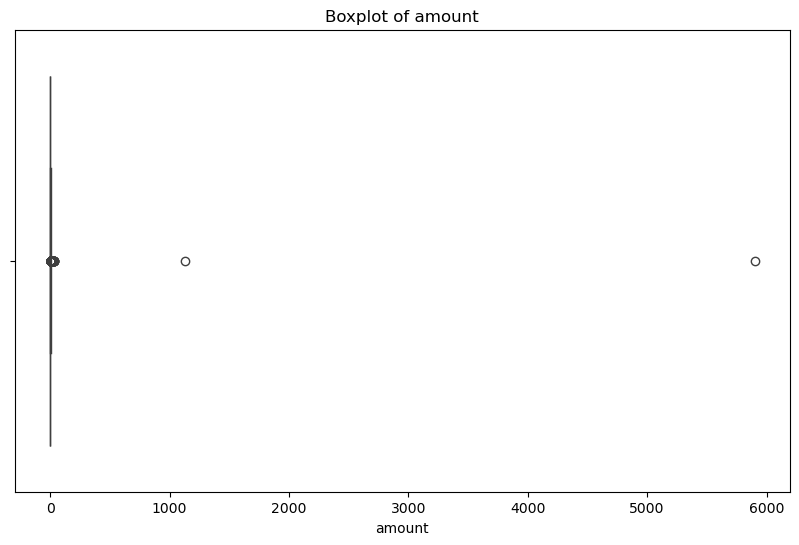


Description of amount:
count    1.048575e+06
mean     1.781032e+00
std      5.966335e+00
min      0.000000e+00
25%      9.900000e-01
50%      1.500000e+00
75%      2.190000e+00
max      5.900000e+03
Name: amount, dtype: float64

Number of outliers in amount: 38847
Percentage of outliers: 3.70%
Min outlier value: 3.99
Max outlier value: 5900.0


In [25]:
# Visualize and describe outliers in 'amount' before removing them
plot_boxplot(sales_df, 'amount')
describe_with_outliers(sales_df, 'amount')

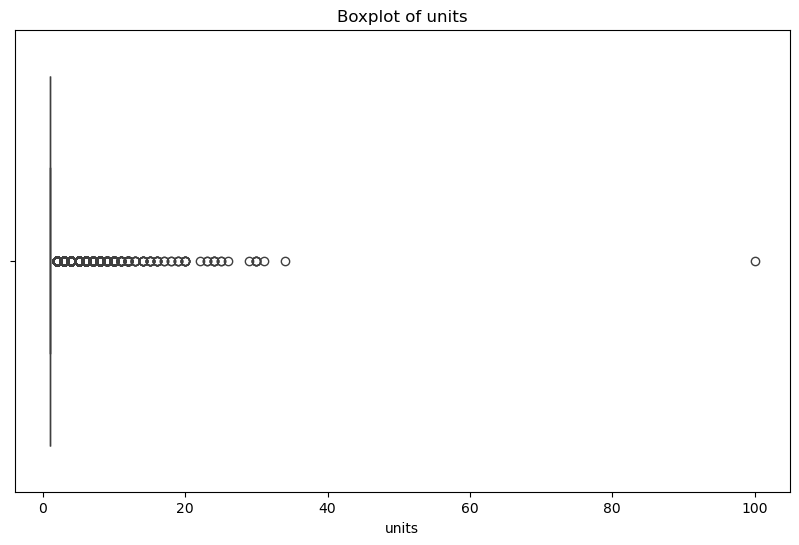


Description of units:
count    1.048575e+06
mean     1.188219e+00
std      5.466197e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+02
Name: units, dtype: float64

Number of outliers in units: 158631
Percentage of outliers: 15.13%
Min outlier value: 2
Max outlier value: 100


In [26]:
# Visualize and describe outliers in 'units' before removing them
plot_boxplot(sales_df, 'units')
describe_with_outliers(sales_df, 'units')

In [30]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR  # Using 3 instead of 1.5 to be more conservative
    upper_bound = Q3 + 3 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [35]:
# Remove outliers from 'amount' and 'units'
sales_df_cleaned = remove_outliers(sales_df, 'amount')
sales_df_cleaned = remove_outliers(sales_df_cleaned, 'units')

In [36]:
# Check the results after removing outliers
print("\nAfter removing outliers:")
print(f"Original dataset size: {len(sales_df)}")
print(f"Cleaned dataset size: {len(sales_df_cleaned)}")
print(f"Removed {len(sales_df) - len(sales_df_cleaned)} rows ({(1 - len(sales_df_cleaned)/len(sales_df))*100:.2f}% of data)")



After removing outliers:
Original dataset size: 888949
Cleaned dataset size: 888949
Removed 0 rows (0.00% of data)


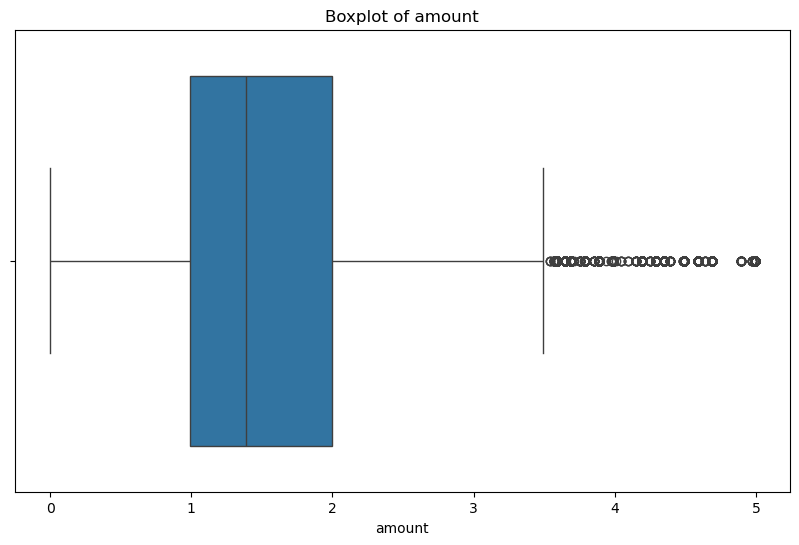

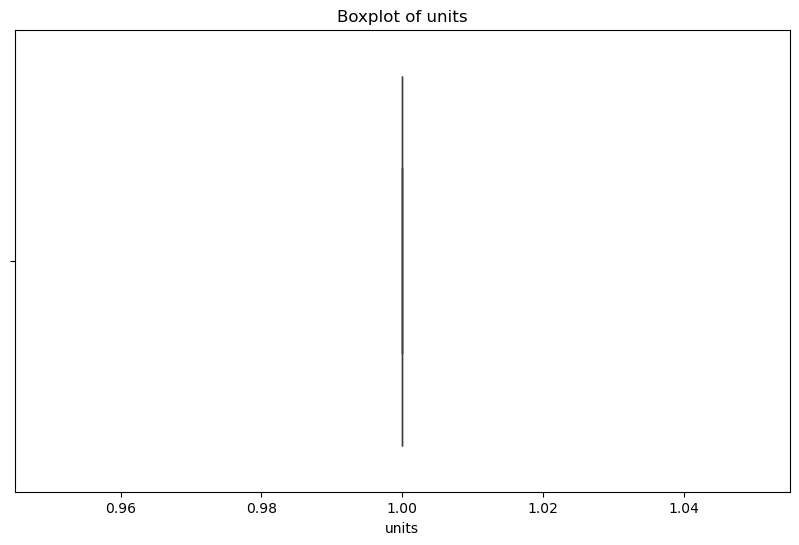

In [37]:
# Plot boxplots after removing outliers
plot_boxplot(sales_df_cleaned, 'amount')
plot_boxplot(sales_df_cleaned, 'units')

In [38]:
# Describe the cleaned data
describe_with_outliers(sales_df_cleaned, 'amount')
describe_with_outliers(sales_df_cleaned, 'units')


Description of amount:
count    888949.000000
mean          1.599264
std           0.824793
min           0.000000
25%           0.990000
50%           1.390000
75%           2.000000
max           4.990000
Name: amount, dtype: float64

Number of outliers in amount: 20566
Percentage of outliers: 2.31%
Min outlier value: 3.54
Max outlier value: 4.99

Description of units:
count    888949.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: units, dtype: float64

Number of outliers in units: 0
Percentage of outliers: 0.00%
Min outlier value: nan
Max outlier value: nan


In [94]:
# Standardize column names
sales_df = sales_df.rename(columns={'supermarket': 'supermarket_id'})
promotion_df = promotion_df.rename(columns={'supermarkets': 'supermarket_id'})
supermarkets_df = supermarkets_df.rename(columns={'supermarket_No': 'supermarket_id'})


In [95]:
# 4. Merge datasets
sales_with_items = pd.merge(sales_df, items_df, on='code', how='left')
sales_with_promo = pd.merge(sales_with_items, promotion_df, on=['code', 'supermarket_id', 'week', 'province'], how='left')
full_dataset = pd.merge(sales_with_promo, supermarkets_df, on='supermarket_id', how='left')


In [96]:
full_dataset.head()

,code,amount,units,time,province,week,customerId,supermarket_id,basket,day,voucher,descrption,type,brand,size,feature,display,postal-code
0,7680850106,0.80,1,11:00:00,2,43,125434,244,1,1,0,BARILLA ANGEL HAIR,2,BARILLA,16 OZ,NaN,NaN,40222
1,3620000470,3.59,1,11:00:00,2,43,125434,244,1,1,0,BERTOLLI TOM&BASIL SAUCE,3,BERTOLLI,24 OZ,NaN,NaN,40222
2,1800028064,2.25,1,11:37:00,2,43,108320,244,2,1,0,H J PANCK BTRMLK COMP MIX,1,HUNGRY JACK,,NaN,NaN,40222
3,9999985067,0.85,1,11:48:00,2,43,162016,244,3,1,0,PRIVATE LABEL VERMICELLI,2,PRIVATE LABEL,16 OZ,NaN,NaN,40222
4,9999985131,2.19,1,13:23:00,2,43,89437,244,4,1,0,PRIVATE LABEL IMPORTED LASAGNA,2,PRIVATE LABEL PREMIUM,16 OZ,NaN,NaN,40222


In [97]:
# Print info about the final dataset
print("\nFinal dataset info:")
print(full_dataset.info())


Final dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 18 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   code            1048575 non-null  int64  
 1   amount          1048575 non-null  float64
 2   units           1048575 non-null  int64  
 3   time            1048575 non-null  object 
 4   province        1048575 non-null  int64  
 5   week            1048575 non-null  int64  
 6   customerId      1048575 non-null  int64  
 7   supermarket_id  1048575 non-null  object 
 8   basket          1048575 non-null  int64  
 9   day             1048575 non-null  int64  
 10  voucher         1048575 non-null  int64  
 11  descrption      1048575 non-null  object 
 12  type            1048575 non-null  int64  
 13  brand           1048575 non-null  object 
 14  size            1048575 non-null  object 
 15  feature         83737 non-null    object 
 16  display        

In [99]:
# Check for NaN values in each dataframe
def check_nan(df, name):
    nan_count = df.isna().sum()
    if nan_count.sum() > 0:
        print(f"\nNaN values found in {name} dataset:")
        print(nan_count[nan_count > 0])
    else:
        print(f"\nNo NaN values found in {name} dataset")

check_nan(sales_df, "Sales")
check_nan(items_df, "Items")
check_nan(promotion_df, "Promotion")
check_nan(supermarkets_df, "Supermarkets")




No NaN values found in Sales dataset

No NaN values found in Items dataset

No NaN values found in Promotion dataset

No NaN values found in Supermarkets dataset


In [100]:
# Check for NaN values after merging
check_nan(full_dataset, "Merged dataset")


NaN values found in Merged dataset dataset:
feature    964838
display    964838
dtype: int64


In [101]:
# 5. Handle NaN values in 'feature' and 'display' columns
full_dataset['has_promotion'] = (~full_dataset['feature'].isna()).astype(int)
full_dataset['feature'] = full_dataset['feature'].fillna('No Promotion')
full_dataset['display'] = full_dataset['display'].fillna('No Display')


In [102]:
# Check NaN values again
check_nan(full_dataset, "Merged dataset after handling NaNs")


No NaN values found in Merged dataset after handling NaNs dataset


In [103]:
# 6. Feature engineering
full_dataset['day_of_week'] = pd.to_datetime(full_dataset['day'], unit='D').dt.dayofweek
full_dataset['is_weekend'] = full_dataset['day_of_week'].isin([5, 6]).astype(int)
full_dataset['total_sales'] = full_dataset['amount'] * full_dataset['units']

In [104]:
# Print info about the final dataset
print("\nFinal dataset info:")
print(full_dataset.info())


Final dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   code            1048575 non-null  int64  
 1   amount          1048575 non-null  float64
 2   units           1048575 non-null  int64  
 3   time            1048575 non-null  object 
 4   province        1048575 non-null  int64  
 5   week            1048575 non-null  int64  
 6   customerId      1048575 non-null  int64  
 7   supermarket_id  1048575 non-null  object 
 8   basket          1048575 non-null  int64  
 9   day             1048575 non-null  int64  
 10  voucher         1048575 non-null  int64  
 11  descrption      1048575 non-null  object 
 12  type            1048575 non-null  int64  
 13  brand           1048575 non-null  object 
 14  size            1048575 non-null  object 
 15  feature         1048575 non-null  object 
 16  display        

In [105]:
# Encode categorical variables
le = LabelEncoder()
for col in ['feature', 'display', 'type', 'brand']:
    full_dataset[col] = le.fit_transform(full_dataset[col].astype(str))


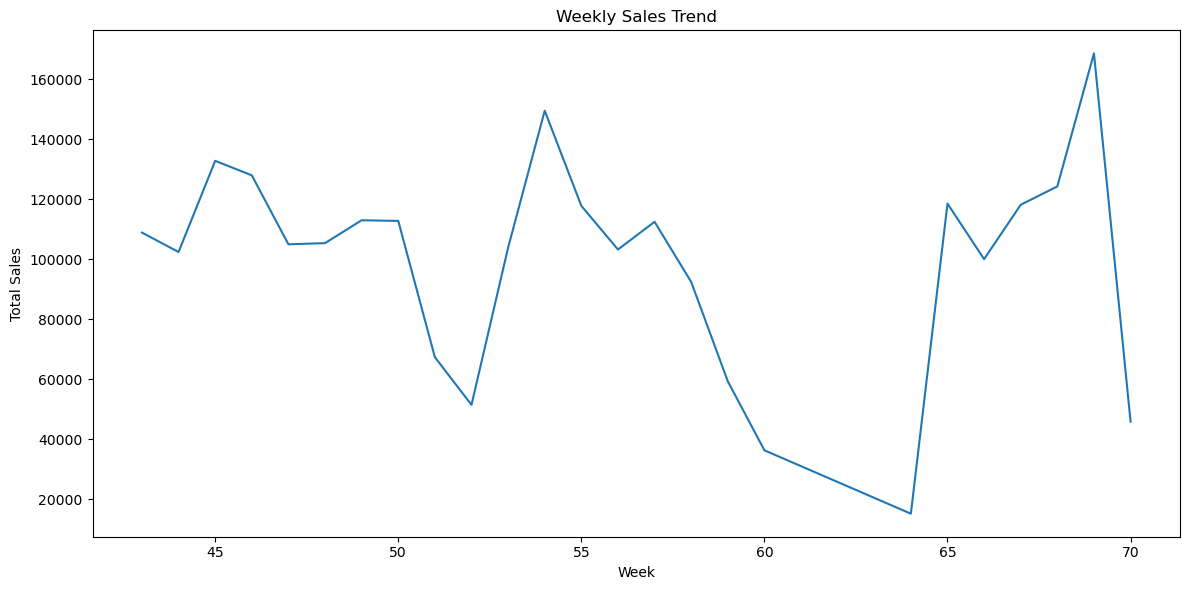

In [106]:
# Group sales by week and calculate total sales
weekly_sales = full_dataset.groupby('week')['total_sales'].sum().reset_index()

# Create a line plot of weekly sales
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales['week'], weekly_sales['total_sales'])
plt.title('Weekly Sales Trend')
plt.xlabel('Week')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


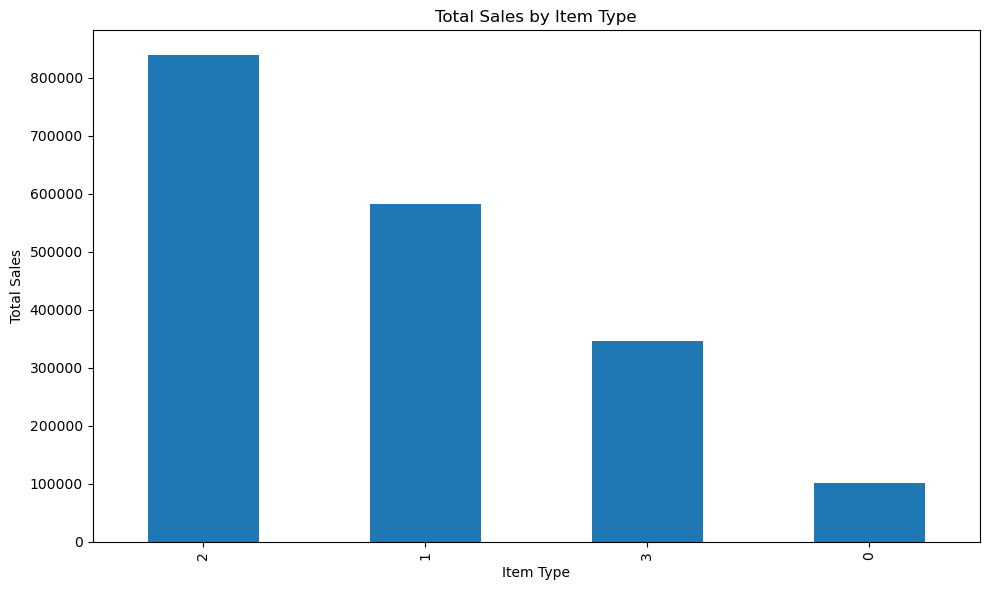

In [113]:
# 1. Sales by item type
sales_by_type = full_dataset.groupby('type')['amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sales_by_type.plot(kind='bar')
plt.title('Total Sales by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

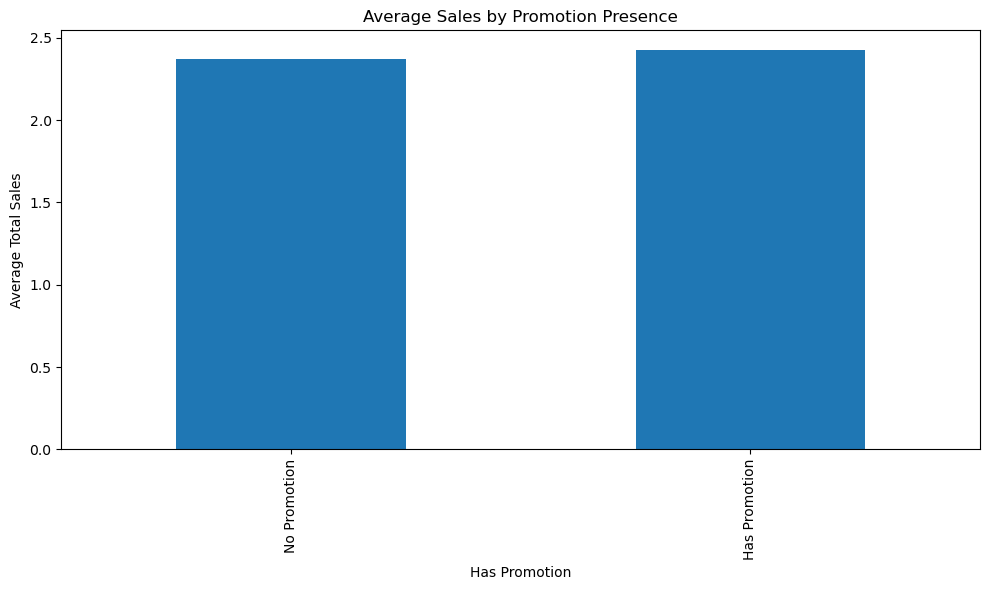

In [107]:
# Analyze the effect of promotions on sales
promo_effect = full_dataset.groupby('has_promotion')['total_sales'].mean()

plt.figure(figsize=(10, 6))
promo_effect.plot(kind='bar')
plt.title('Average Sales by Promotion Presence')
plt.xlabel('Has Promotion')
plt.ylabel('Average Total Sales')
plt.xticks([0, 1], ['No Promotion', 'Has Promotion'])
plt.tight_layout()
plt.show()

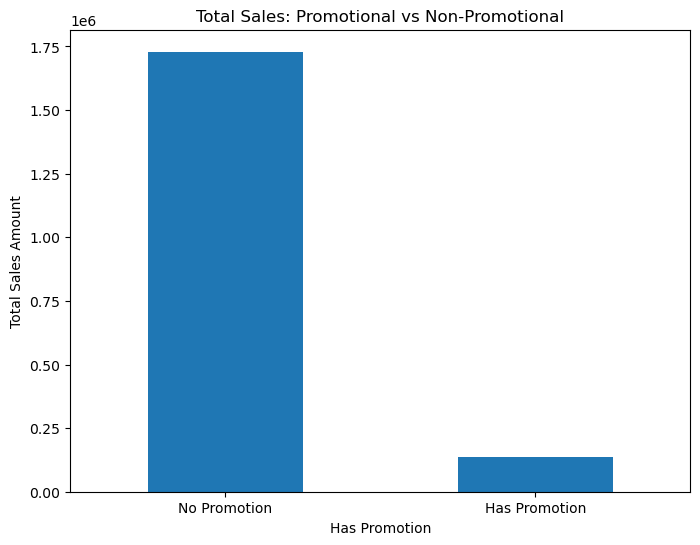

In [125]:
# 6. Analyze sales with and without promotions
sales_by_promotion = full_dataset.groupby('has_promotion')['amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sales_by_promotion.plot(kind='bar')
plt.title('Total Sales: Promotional vs Non-Promotional')
plt.xlabel('Has Promotion')
plt.ylabel('Total Sales Amount')
plt.xticks([0, 1], ['No Promotion', 'Has Promotion'], rotation=0)
plt.show()


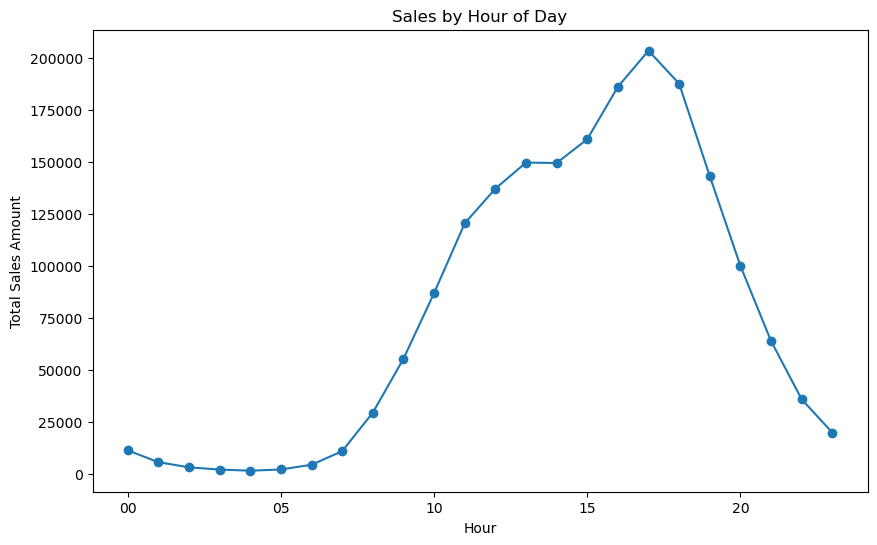

In [116]:
# 4. Time-based Analysis
hourly_sales = full_dataset.groupby(full_dataset['time'].astype(str).str[:2])['amount'].sum()
plt.figure(figsize=(10, 6))
hourly_sales.plot(kind='line', marker='o')
plt.title('Sales by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Total Sales Amount')
plt.show()

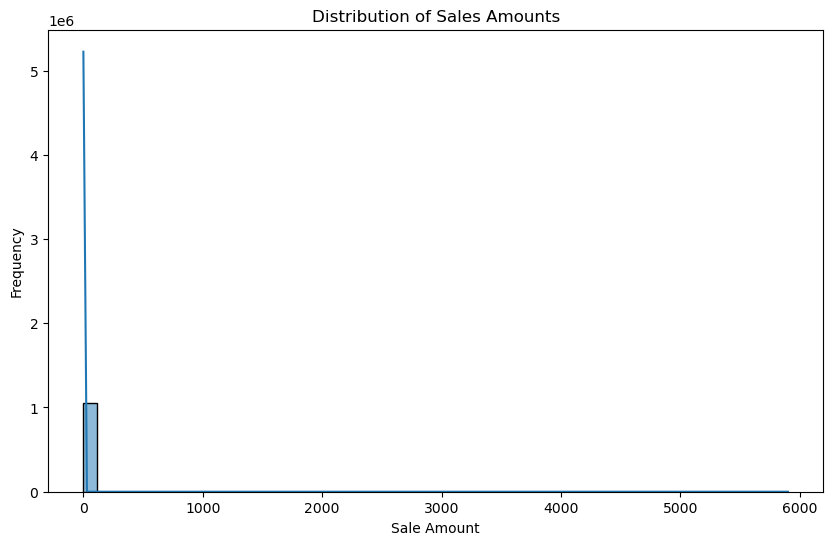

In [118]:
# 2. Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(full_dataset['amount'], bins=50, kde=True)
plt.title('Distribution of Sales Amounts')
plt.xlabel('Sale Amount')
plt.ylabel('Frequency')
plt.show()


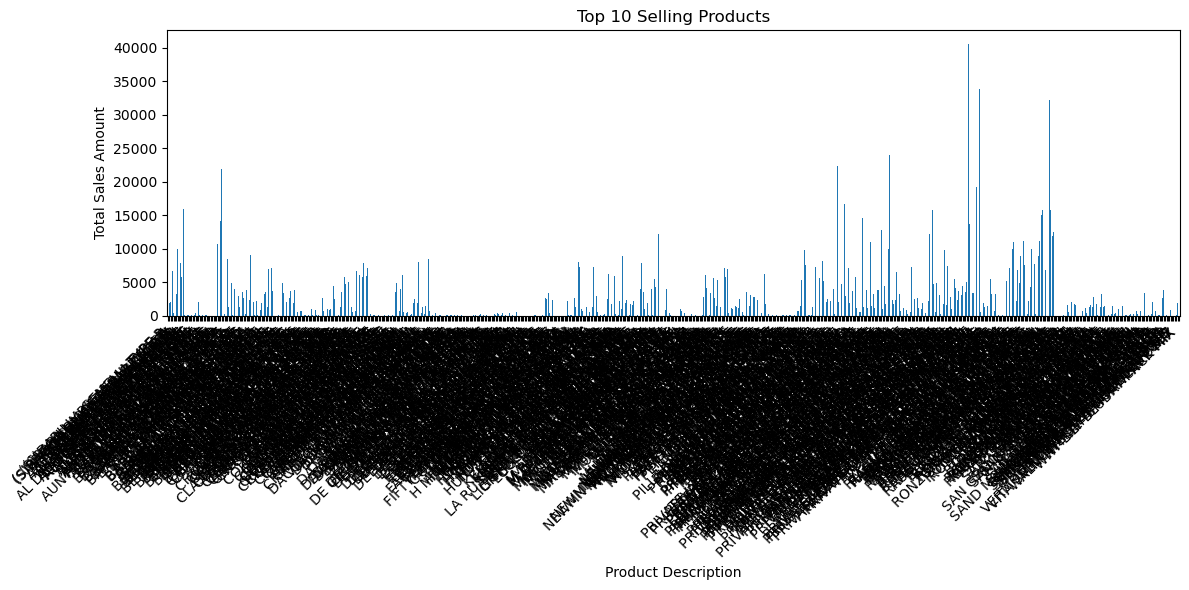

In [130]:
# 2. Top selling products
top_products = full_dataset.groupby('descrption')['amount'].sum()
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar')
plt.title('Top 10 Selling Products')
plt.xlabel('Product Description')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


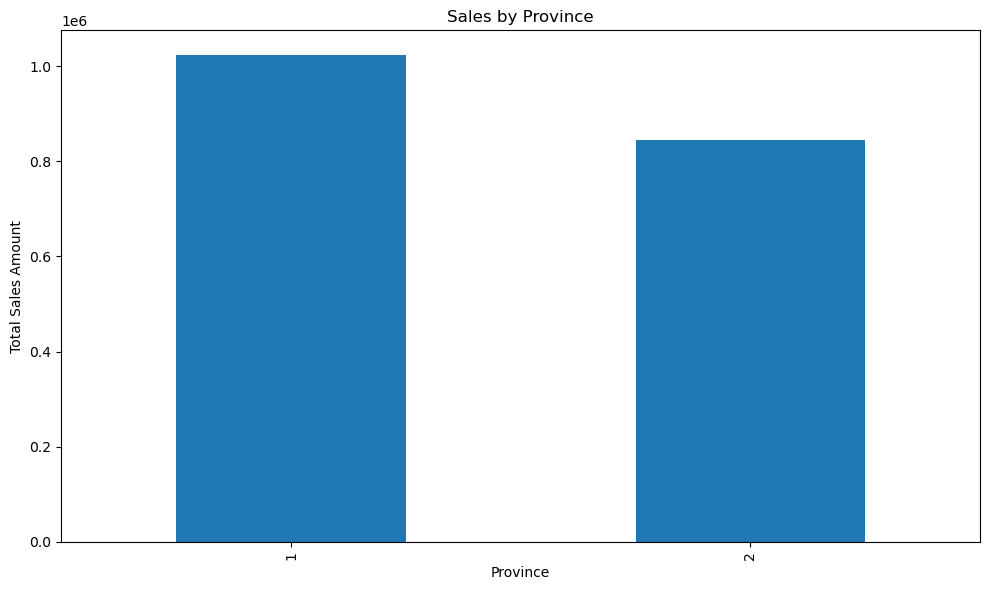

In [122]:
# 3. Sales by province
sales_by_province = full_dataset.groupby('province')['amount'].sum()
plt.figure(figsize=(10, 6))
sales_by_province.plot(kind='bar')
plt.title('Sales by Province')
plt.xlabel('Province')
plt.ylabel('Total Sales Amount')
plt.tight_layout()
plt.show()

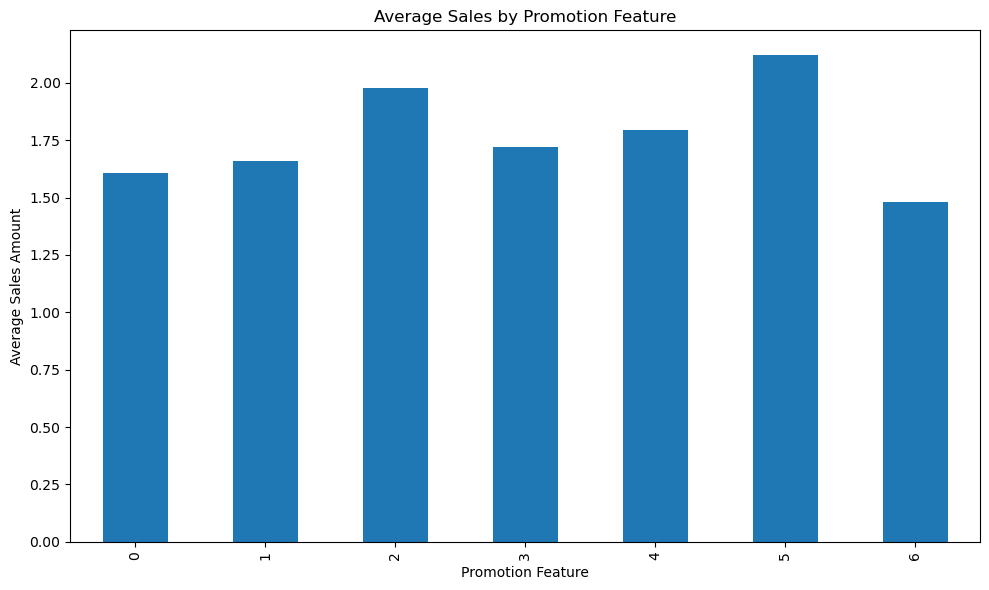

In [124]:
# 4. Promotion effectiveness
promo_effectiveness = full_dataset.groupby('feature')['amount'].mean()
plt.figure(figsize=(10, 6))
promo_effectiveness.plot(kind='bar')
plt.title('Average Sales by Promotion Feature')
plt.xlabel('Promotion Feature')
plt.ylabel('Average Sales Amount')
plt.tight_layout()
plt.show()

In [108]:
# Business Insight 2: Customer Segmentation using K-means Clustering

# Prepare data for clustering
clustering_data = full_dataset.groupby('customerId').agg({
    'total_sales': 'sum',
    'units': 'sum',
    'basket': 'nunique',
    'has_promotion': 'mean'
}).reset_index()

In [109]:
# Normalize the data
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data[['total_sales', 'units', 'basket', 'has_promotion']])


In [110]:
# Perform K-means clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clustering_data['Cluster'] = kmeans.fit_predict(clustering_data_scaled)


/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


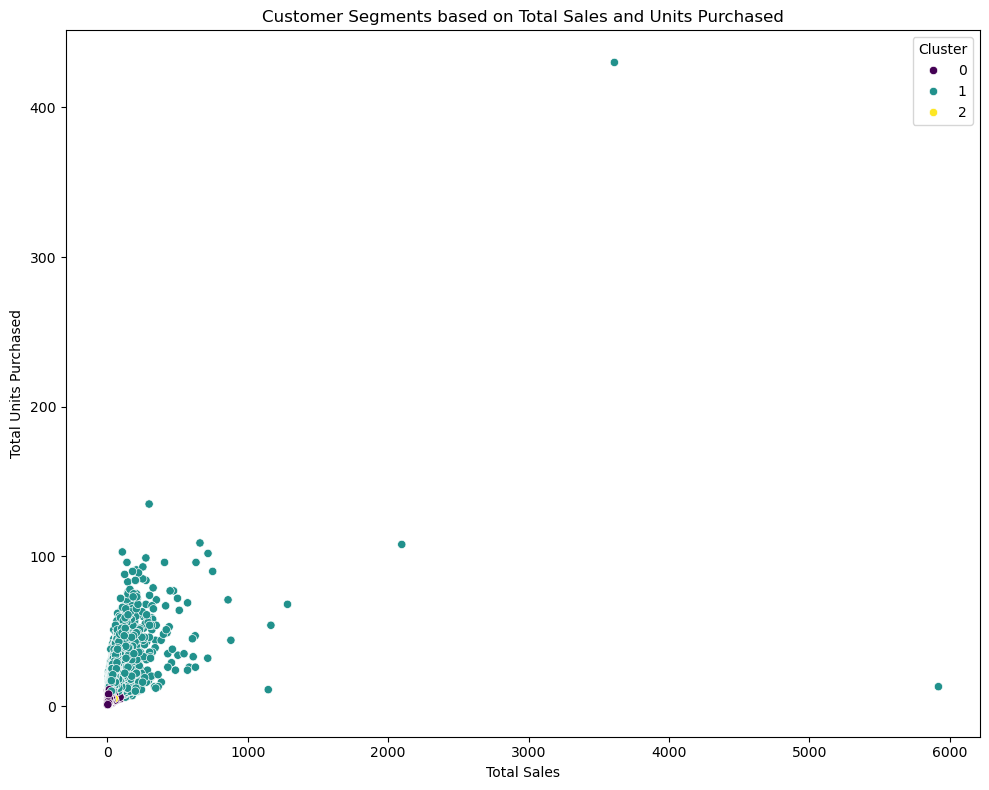

In [111]:
# Visualize the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=clustering_data, x='total_sales', y='units', hue='Cluster', palette='viridis')
plt.title('Customer Segments based on Total Sales and Units Purchased')
plt.xlabel('Total Sales')
plt.ylabel('Total Units Purchased')
plt.tight_layout()
plt.show()

In [112]:
# Analyze cluster characteristics
cluster_analysis = clustering_data.groupby('Cluster').agg({
    'customerId': 'count',
    'total_sales': 'mean',
    'units': 'mean',
    'basket': 'mean',
    'has_promotion': 'mean'
}).reset_index()

print("\nCluster Analysis:")
print(cluster_analysis)


Cluster Analysis:
   Cluster  customerId  total_sales      units    basket  has_promotion
0        0      191123     6.055424   3.233049  1.894178       0.014867
1        1       35923    33.280726  15.363138  7.308243       0.078020
2        2       22564     6.123181   3.374269  1.812400       0.597052
